In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [4]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [6]:
add_op = a + b

In [7]:
mul_op = a * b

In [8]:
with tf.Session() as sess:
    print(sess.run(tf.ones([6])))

[ 1.  1.  1.  1.  1.  1.]


In [9]:
with tf.Session() as sess:
    print(sess.run(add_op,feed_dict={a:rand_a,b:rand_b}))
    
    print("\n")
    
    print(sess.run(mul_op,feed_dict={a:rand_a,b:rand_b}))

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Tensorflow Basic NN

In [10]:
n_features = 10
n_dense_neurons = 3

In [11]:
# shape of is x is (n_training_examples, n_features)
x = tf.placeholder(tf.float32,shape=(None,n_features))

In [12]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [13]:
b = tf.Variable(tf.ones([n_dense_neurons])) 

In [14]:
Wx = tf.matmul(x,W)

In [15]:
z = tf.add(Wx,b)

In [16]:
a = tf.sigmoid(z)

In [17]:
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    
    print(layer_out)

[[ 0.90146554  0.64960819  0.95483005]]


In [19]:
np.random.random((1,n_features))

array([[ 0.09714648,  0.10284749,  0.7015073 ,  0.89047987,  0.1595603 ,
         0.27557254,  0.67249153,  0.16430312,  0.70137114,  0.48763522]])

# Simple Regression

In [20]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [21]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([ -0.17289561,   2.24387308,   3.57001461,   3.26783558,
         4.32780247,   5.96742265,   6.14049066,   6.63051206,
         7.54219188,  10.41297596])

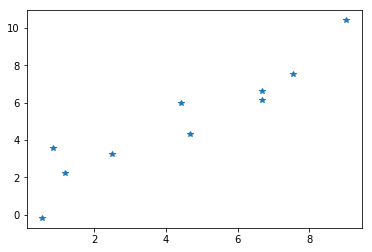

In [22]:
plt.plot(x_data,y_label,'*')

In [26]:
np.random.rand(2)

array([ 0.65992452,  0.5296234 ])

In [27]:
m = tf.Variable(np.random.rand(2)[0])
b = tf.Variable(np.random.rand(2)[1])

In [28]:
list(zip(x_data,y_label))

[(0.54203330452907661, -0.17289560546176563),
 (1.1757556880886892, 2.2438730849940156),
 (0.85241230552447522, 3.5700146091778042),
 (2.5051431438392662, 3.2678355837020416),
 (4.6700597050484838, 4.3278024713037482),
 (4.4168565359374323, 5.9674226486076263),
 (6.6670168080690466, 6.1404906559792778),
 (6.6918064825544663, 6.630512056861761),
 (7.5473140921566877, 7.5421918780762134),
 (9.0348307676084545, 10.412975958453476)]

In [29]:
error = 0

for x,y in zip(x_data,y_label):
    
    # get the predicted value
    y_hat = m*x+b
    
    # calculate by how much predicted value is off and square it
    error += (y - y_hat)**2



In [30]:
error

<tf.Tensor 'add_20:0' shape=() dtype=float64>

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [32]:
train = optimizer.minimize(error)

In [33]:
init = tf.global_variables_initializer()

In [34]:
training_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])    
    

In [35]:
final_slope, final_intercept

(0.91774386558137944, 0.94528837697573675)

In [36]:
x_test = np.linspace(-1,11,10)
y_test = final_slope * x_test + final_intercept

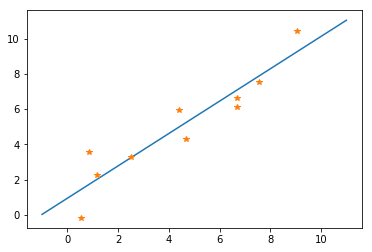

In [37]:
plt.plot(x_test,y_test)
plt.plot(x_data,y_label,'*')